<a href="https://colab.research.google.com/github/mritunjoychk17/Dengue-Prediction-in-Bangladesh-Using-Machine-Learning/blob/main/DENGUE_STACKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [ ]:
data= pd.read_excel('/content/drive/MyDrive/Dengue Research/Report Dengue Dataset.xlsx')

In [ ]:
data.head()

,Serial,Date,Gender,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets,Result
0,A2308164543,2023-02-08 00:00:00,Female,40.0,11.2,32.0,11.30,65.0,23.0,10.0,2.0,0.0,4.04,30,Positive
1,A2308164502,2023-02-08 00:00:00,Male,13.0,11.6,59.0,7.80,49.0,42.0,9.0,0.0,0.0,4.34,40,Positive
2,A2308164673,2023-03-08 00:00:00,Male,23.0,15.1,NaN,3.85,65.0,25.0,9.0,1.0,0.0,5.43,30,Positive
3,A2308164685,2023-03-08 00:00:00,Male,58.0,8.5,NaN,10.30,85.0,6.0,6.0,3.0,0.0,3.00,30,Positive
4,A2308164626,2023-02-08 00:00:00,Female,35.0,12.0,28.0,6.70,54.0,20.0,4.0,1.0,0.0,4.30,40,Positive


In [ ]:
data.describe()

,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets
count,320.000000,320.00000,271.000000,320.000000,319.000000,319.000000,319.000000,319.000000,318.000000,319.000000,320.000000
mean,33.894781,12.61375,27.763838,7.589719,59.440752,32.110972,6.616928,1.995611,0.008176,4.654922,110.315625
std,16.522486,2.56636,27.323364,4.901370,16.167674,14.862772,3.257130,1.613576,0.116991,0.956804,102.110290
min,0.600000,1.70000,1.000000,0.540000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,5.000000
25%,23.000000,11.20000,9.500000,4.400000,48.000000,21.000000,4.000000,1.000000,0.000000,4.260000,25.000000
50%,29.500000,13.00000,16.000000,6.270000,58.000000,33.000000,6.000000,2.000000,0.000000,4.780000,80.000000
75%,42.250000,14.30000,35.000000,8.910000,71.500000,42.000000,8.000000,2.000000,0.000000,5.230000,162.250000
max,81.000000,19.20000,130.000000,32.600000,92.000000,88.000000,29.000000,11.000000,2.000000,7.070000,540.000000


In [ ]:
data = data.drop(columns = ['Serial','Date'])

In [ ]:
data.dtypes

Gender          object
Age            float64
Haemoglobin    float64
ESR            float64
WBC            float64
Neutrophil     float64
Lymphocyte     float64
Monocyte       float64
Eosinophil     float64
Basophil       float64
RBC            float64
Platelets        int64
Result          object
dtype: object

In [ ]:
data.isnull().sum()

Gender          0
Age             0
Haemoglobin     0
ESR            49
WBC             0
Neutrophil      1
Lymphocyte      1
Monocyte        1
Eosinophil      1
Basophil        2
RBC             1
Platelets       0
Result          0
dtype: int64

**Handling Null Values**

In [ ]:
from sklearn.impute import SimpleImputer

columns_impute = ['ESR', 'Lymphocyte', 'Monocyte', 'Eosinophil', 'Basophil', 'RBC','Neutrophil']
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data[columns_impute])
data[columns_impute] = imputer.transform(data[columns_impute])


In [ ]:
data.shape

(320, 13)

In [ ]:
data.isnull().sum()

Gender         0
Age            0
Haemoglobin    0
ESR            0
WBC            0
Neutrophil     0
Lymphocyte     0
Monocyte       0
Eosinophil     0
Basophil       0
RBC            0
Platelets      0
Result         0
dtype: int64

In [ ]:
data.describe()

,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets
count,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,33.894781,12.61375,27.763838,7.589719,59.440752,32.110972,6.616928,1.995611,0.008176,4.654922,110.315625
std,16.522486,2.56636,25.137421,4.901370,16.142313,14.839458,3.252021,1.611045,0.116624,0.955303,102.110290
min,0.600000,1.70000,1.000000,0.540000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,5.000000
25%,23.000000,11.20000,10.000000,4.400000,48.000000,21.000000,4.000000,1.000000,0.000000,4.265000,25.000000
50%,29.500000,13.00000,22.000000,6.270000,58.000000,33.000000,6.000000,2.000000,0.000000,4.780000,80.000000
75%,42.250000,14.30000,30.250000,8.910000,71.250000,42.000000,8.000000,2.000000,0.000000,5.230000,162.250000
max,81.000000,19.20000,130.000000,32.600000,92.000000,88.000000,29.000000,11.000000,2.000000,7.070000,540.000000


In [ ]:
data['Result'].value_counts()

Result
Positive    211
Negative    109
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Result_cat'] = labelencoder.fit_transform(data['Result'])

In [ ]:
data['Result_cat'].value_counts()

Result_cat
1    211
0    109
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data=data, drop_first=True, columns=['Gender'])

In [ ]:
data = data.drop(columns = ['Result'])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['Result_cat'], axis=1)
y = data['Result_cat']

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, temp_X, y_train, temp_y = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)
X_test, X_cv, y_test, y_cv = train_test_split(temp_X, temp_y, test_size=0.5, random_state=23, stratify=temp_y)

# features standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_cv_scaled = scaler.transform(X_cv)

print("Shape of scaled training data:", X_train_scaled.shape, y_train.shape)
print("Shape of scaled testing data:", X_test_scaled.shape, y_test.shape)
print("Shape of scaled cross-validation data:", X_cv_scaled.shape, y_cv.shape)


Shape of scaled training data: (256, 12) (256,)
Shape of scaled testing data: (32, 12) (32,)
Shape of scaled cross-validation data: (32, 12) (32,)


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
pip install numpy pandas scikit-learn xgboost lightgbm


In [ ]:
pip install imbalanced-learn


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define base models
base_models = [
    ('XGB', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)),
    ('LR', LogisticRegression(max_iter=100)),
    ('MLP', MLPClassifier(activation='relu', max_iter=100))
]

# Define meta-model
meta_model = LGBMClassifier()

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    stack_method='predict_proba'
)

# Train stacking classifier on resampled data
stacking_clf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
report = classification_report(y_test, y_pred,digits=4)
print('Classification Report:')
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Info] Number of positive: 169, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 338, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
pip install tensorflow pandas scikit-learn

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation='relu'),
            tf.keras.layers.Dense(embed_dim)
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TabTransformer(tf.keras.Model):
    def __init__(self, num_features, num_classes, embed_dim=32, num_heads=4, ff_dim=64, num_transformer_blocks=2, rate=0.1):
        super(TabTransformer, self).__init__()
        self.embedding = tf.keras.layers.Dense(embed_dim, activation='relu')
        self.transformer_blocks = [
            TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_transformer_blocks)
        ]
        self.global_avg_pool = tf.keras.layers.GlobalAveragePooling1D()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.final_dense = tf.keras.layers.Dense(1, activation='sigmoid')  # Use a single output neuron for binary classification

    def call(self, inputs, training=False):
        x = self.embedding(inputs)
        x = tf.expand_dims(x, axis=1)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, training=training)
        x = self.global_avg_pool(x)
        x = self.dense1(x)
        x = self.dropout(x, training=training)
        return self.final_dense(x)

# Assuming X and y are already defined as NumPy arrays or pandas DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert pandas DataFrame to NumPy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ensure data is of type float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32).reshape(-1, 1)
y_test = y_test.astype(np.float32).reshape(-1, 1)

# Convert data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)

# Instantiate and compile the model
num_features = X_train.shape[1]
model = TabTransformer(num_features, 1)  # For binary classification, num_classes=1

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Use binary cross-entropy
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=50, validation_data=test_dataset)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict class probabilities for test set
y_pred_prob = model.predict(test_dataset)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)

# Print classification report
print(report)


Epoch 1/50
28/28 [==============================] - 11s 53ms/step - loss: 0.6503 - accuracy: 0.6161 - val_loss: 0.6314 - val_accuracy: 0.6458
Epoch 2/50
28/28 [==============================] - 0s 14ms/step - loss: 0.6544 - accuracy: 0.5982 - val_loss: 0.5658 - val_accuracy: 0.7396
Epoch 3/50
28/28 [==============================] - 0s 16ms/step - loss: 0.5505 - accuracy: 0.7500 - val_loss: 0.5217 - val_accuracy: 0.7812
Epoch 4/50
28/28 [==============================] - 0s 15ms/step - loss: 0.5455 - accuracy: 0.7634 - val_loss: 0.4865 - val_accuracy: 0.7708
Epoch 5/50
28/28 [==============================] - 0s 16ms/step - loss: 0.5099 - accuracy: 0.7411 - val_loss: 0.4553 - val_accuracy: 0.7917
Epoch 6/50
28/28 [==============================] - 0s 16ms/step - loss: 0.4852 - accuracy: 0.7589 - val_loss: 0.4302 - val_accuracy: 0.8021
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 0.4597 - accuracy: 0.7857 - val_loss: 0.4068 - val_accuracy: 0.8021
Epoch 8/50
2

In [ ]:
pip install tabpfn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 2.1 MB/s eta 0:00:00


##TabPFN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from tabpfn import TabPFNClassifier

# Assuming X and y are already defined as NumPy arrays or pandas DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert pandas DataFrame to NumPy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the TabPFN classifier
tabpfn_clf = TabPFNClassifier(device='cpu', N_ensemble_configurations=8)

# Train the model
tabpfn_clf.fit(X_train, y_train)

# Predict class probabilities for test set
y_pred_prob = tabpfn_clf.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(report)


We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Accuracy: 0.9479
ROC AUC: 0.9785
              precision    recall  f1-score   support

           0     0.9091    0.9375    0.9231        32
           1     0.9683    0.9531    0.9606        64

    accuracy                         0.9479        96
   macro avg     0.9387    0.9453    0.9419        96
weighted avg     0.9485    0.9479    0.9481        96



In [ ]:
pip install --upgrade lightgbm


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


##LightGBM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from lightgbm import LGBMClassifier

# Assuming X and y are already defined as NumPy arrays or pandas DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert pandas DataFrame to NumPy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the LightGBM classifier with early stopping
lgbm_clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss',
                          num_leaves=31, learning_rate=0.05, feature_fraction=0.9, n_estimators=1000,
                          early_stopping_rounds=10)

# Train the model
lgbm_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_logloss')

# Predict class probabilities for test set
y_pred_prob = lgbm_clf.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(report)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 147, number of negative: 77
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGB

GRID **LGBM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from lightgbm import LGBMClassifier

# Assuming X and y are already defined as NumPy arrays or pandas DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert pandas DataFrame to NumPy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the LightGBM classifier
lgbm_clf = LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss')

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'feature_fraction': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(report)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 98, number of negative: 51
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.657718 -> initscore=0.653142
[LightGBM] [Info] Start training from score 0.653142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import f_classif, SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
# Function to compute Pearson correlation coefficients
def compute_pearson_correlation(X_train, y_train):
    corr_values = []
    for feature in X_train.columns:
        correlation = np.abs(np.corrcoef(X_train[feature], y_train)[0, 1])
        corr_values.append((feature, correlation))
    return sorted(corr_values, key=lambda x: x[1], reverse=True)

# Select top k features based on Pearson correlation
def select_top_features_corr(X_train, y_train, k_features):
    corr_values = compute_pearson_correlation(X_train, y_train)
    selected_features = [feat for feat, _ in corr_values[:k_features]]
    return selected_features

# Function to apply Recursive Feature Elimination (RFE)
def apply_rfe(model, n_features_to_select, X_train, y_train, X_test):
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    return X_train_rfe, X_test_rfe

# Function to apply SelectKBest with ANOVA F-value
def apply_selectkbest(X_train, y_train, X_test, k_best):
    skb = SelectKBest(f_classif, k=k_best)
    X_train_skb = skb.fit_transform(X_train, y_train)
    X_test_skb = skb.transform(X_test)
    return X_train_skb, X_test_skb

# Function to apply Chi-Square Test
def apply_chi2(X_train, y_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    chi2_selector = SelectKBest(chi2, k='all')
    X_train_chi2 = chi2_selector.fit_transform(X_train_scaled, y_train)
    X_test_chi2 = chi2_selector.transform(X_test_scaled)

    return X_train_chi2, X_test_chi2

# Function to apply Extra Trees Classifier for feature selection
def apply_extra_trees(X_train, y_train, X_test):
    etc = ExtraTreesClassifier()
    etc.fit(X_train, y_train)
    model = SelectFromModel(etc, prefit=True)
    X_train_etc = model.transform(X_train)
    X_test_etc = model.transform(X_test)
    return X_train_etc, X_test_etc

# Read your data and define X, y
# Assuming X and y are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Select top features using Pearson correlation
k_features_corr = min(10, X_train_resampled.shape[1])  # adjust as needed
selected_features_corr = select_top_features_corr(X_train_resampled, y_train_resampled, k_features_corr)
X_train_corr = X_train_resampled[selected_features_corr]
X_test_corr = X_test[selected_features_corr]

# Define the number of features to select for other methods
n_features_to_select_rfe = 10  # adjust as needed
k_best_features = min(10, X_train_resampled.shape[1])  # adjust as needed

# Apply feature selection using other methods
X_train_rfe, X_test_rfe = apply_rfe(DecisionTreeClassifier(), n_features_to_select_rfe, X_train_resampled, y_train_resampled, X_test)
X_train_skb, X_test_skb = apply_selectkbest(X_train_resampled, y_train_resampled, X_test, k_best_features)
X_train_chi2, X_test_chi2 = apply_chi2(X_train_resampled, y_train_resampled, X_test)
X_train_etc, X_test_etc = apply_extra_trees(X_train_resampled, y_train_resampled, X_test)

# Initialize models
models = {
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'LGBM': LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss'),
}

# Iterate through models and evaluate performance with different feature selection methods
for name, model in models.items():
    print(f'\n{80 * "-"}\n{name}\n{80 * "-"}')

    # Evaluate with features selected using Pearson correlation
    model.fit(X_train_corr, y_train_resampled)
    corr_accuracy = model.score(X_test_corr, y_test)
    print(f'Pearson Correlation Accuracy: {corr_accuracy:.5f}')

    # Evaluate with other feature selection methods
    model.fit(X_train_rfe, y_train_resampled)
    rfe_accuracy = model.score(X_test_rfe, y_test)
    print(f'RFE Accuracy: {rfe_accuracy:.5f}')

    model.fit(X_train_skb, y_train_resampled)
    skb_accuracy = model.score(X_test_skb, y_test)
    print(f'SelectKBest Accuracy: {skb_accuracy:.5f}')

    model.fit(X_train_chi2, y_train_resampled)
    chi2_accuracy = model.score(X_test_chi2, y_test)
    print(f'Chi-Square Test Accuracy: {chi2_accuracy:.5f}')

    model.fit(X_train_etc, y_train_resampled)
    etc_accuracy = model.score(X_test_etc, y_test)
    print(f'Extra Trees Classifier Accuracy: {etc_accuracy:.5f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo


--------------------------------------------------------------------------------
Perceptron
--------------------------------------------------------------------------------
Pearson Correlation Accuracy: 0.93750
RFE Accuracy: 0.82292
SelectKBest Accuracy: 0.93750
Chi-Square Test Accuracy: 0.82292
Extra Trees Classifier Accuracy: 0.83333

--------------------------------------------------------------------------------
MLP
--------------------------------------------------------------------------------
Pearson Correlation Accuracy: 0.89583


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RFE Accuracy: 0.86458
SelectKBest Accuracy: 0.88542


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Chi-Square Test Accuracy: 0.88542
Extra Trees Classifier Accuracy: 0.87500

--------------------------------------------------------------------------------
LGBM
--------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 147, number of negative: 147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 294, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

##StackingClassifier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define base models
base_models = [
    ('XGB', XGBClassifier()),
    ('LR', LogisticRegression(max_iter=100)),
    ('MLP', MLPClassifier(activation='relu', max_iter=100))
]

# Define meta-model
meta_model =MLPClassifier(activation='relu')
# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer

StackingClassifier(estimators=[('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('LR', LogisticRegression()),
                               ('MLP', MLPClassifier(max_iter=100))],
                   final_estimator=MLPClassifier())

In [ ]:
# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# Print classification report
print(classification_report(y_test, y_pred,digits=4))

Accuracy: 0.9479
              precision    recall  f1-score   support

           0     0.9091    0.9375    0.9231        32
           1     0.9683    0.9531    0.9606        64

    accuracy                         0.9479        96
   macro avg     0.9387    0.9453    0.9419        96
weighted avg     0.9485    0.9479    0.9481        96



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models with given names
base_models = [
    ('XGB', LogisticRegression()),
    ('MLP', MLPClassifier()),
    ('LR', LogisticRegression())
]

# Define parameter grids for base models
base_param_grids = [
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
]

# Define parameter grid for meta-model (LGBMClassifier)
meta_param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

best_estimators = []

# Perform grid search for each base model
for (model_name, model), param_grid in zip(base_models, base_param_grids):
    clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_estimators.append((model_name, clf.best_estimator_))
    print(f"Best parameters for {model_name}:", clf.best_params_)
    print(f"Best score for {model_name}:", clf.best_score_)
    print()

# Perform grid search for meta-model (LGBMClassifier)
meta_clf = GridSearchCV(LGBMClassifier(), meta_param_grid, cv=5, scoring='accuracy')
meta_clf.fit(X_train, y_train)
print("Best parameters for meta-model (LGBMClassifier):", meta_clf.best_params_)
print("Best score for meta-model (LGBMClassifier):", meta_clf.best_score_)
print()

# Define meta-model with the best parameters
best_meta_model = LGBMClassifier(**meta_clf.best_params_)

# Create stacking classifier with best base models and meta-model
stacking_clf = StackingClassifier(
    estimators=best_estimators,
    final_estimator=best_meta_model
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate on test set
y_pred = stacking_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1)

Best parameters for XGB: {'C': 0.001, 'penalty': 'l2'}
Best score for XGB: 0.8592760180995475



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best score for MLP: 0.8671191553544494



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 135, number of negative: 69
[LightGBM] [Info] A

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 169, number of negative: 87
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.660156 -> initscore=0.663991
[LightGBM] [Info] Start training from score 0.663991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMClassifier
from scipy.stats import pearsonr

# Standardize the data for most methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the data for Chi-square feature selection
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split normalized data for Chi-square feature selection
X_train_normalized, X_test_normalized = train_test_split(X_normalized, test_size=0.2, random_state=42)

# Define base models with given names
base_models = [
    ('XGB', LogisticRegression(max_iter=1000)),
    ('MLP', MLPClassifier(max_iter=1000)),
    ('LR', LogisticRegression(max_iter=1000))
]

# Define parameter grids for base models
base_param_grids = [
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
]

# Define parameter grid for meta-model (LGBMClassifier)
meta_param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Function to evaluate stacking classifier with feature selection
def evaluate_stacking(X_train, X_test, y_train, y_test):
    best_estimators = []

    # Perform grid search for each base model
    for (model_name, model), param_grid in zip(base_models, base_param_grids):
        clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        clf.fit(X_train, y_train)
        best_estimators.append((model_name, clf.best_estimator_))
        print(f"Best parameters for {model_name}:", clf.best_params_)
        print(f"Best score for {model_name}:", clf.best_score_)
        print()

    # Perform grid search for meta-model (LGBMClassifier)
    meta_clf = GridSearchCV(LGBMClassifier(), meta_param_grid, cv=5, scoring='accuracy')
    meta_clf.fit(X_train, y_train)
    print("Best parameters for meta-model (LGBMClassifier):", meta_clf.best_params_)
    print("Best score for meta-model (LGBMClassifier):", meta_clf.best_score_)
    print()

    # Define meta-model with the best parameters
    best_meta_model = LGBMClassifier(**meta_clf.best_params_)

    # Create stacking classifier with best base models and meta-model
    stacking_clf = StackingClassifier(
        estimators=best_estimators,
        final_estimator=best_meta_model
    )

    # Train stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Evaluate on test set
    y_pred = stacking_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    return test_accuracy

# Pearson correlation
def select_features_pearson(X, y, threshold=0.1):
    selected_features = []
    for i in range(X.shape[1]):
        corr, _ = pearsonr(X[:, i], y)
        if abs(corr) > threshold:
            selected_features.append(i)
    return selected_features

# Recursive Feature Elimination (RFE)
def select_features_rfe(X, y, n_features=2):
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select=n_features)
    fit = rfe.fit(X, y)
    return fit.support_

# Chi-square feature selection
def select_features_chi2(X, y, k=2):
    chi2_selector = SelectKBest(chi2, k=k)
    chi2_selector.fit(X, y)
    return chi2_selector.get_support()

# SelectKBest with ANOVA F-value
def select_features_anova(X, y, k=2):
    anova_selector = SelectKBest(f_classif, k=k)
    anova_selector.fit(X, y)
    return anova_selector.get_support()

# Extra Trees feature selection
def select_features_extra_trees(X, y, n_features=2):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_features:]
    mask = np.zeros_like(importances, dtype=bool)
    mask[indices] = True
    return mask

# Apply and evaluate feature selection methods
feature_selection_methods = {
    "Pearson": select_features_pearson,
    "RFE": select_features_rfe,
    "Chi2": select_features_chi2,
    "ANOVA": select_features_anova,
    "ExtraTrees": select_features_extra_trees
}

for method_name, method_func in feature_selection_methods.items():
    print(f"Evaluating with {method_name} feature selection...")
    if method_name == "Chi2":
        selected_features_mask = method_func(X_train_normalized, y_train)
        X_train_selected = X_train_normalized[:, selected_features_mask]
        X_test_selected = X_test_normalized[:, selected_features_mask]
    else:
        selected_features_mask = method_func(X_train, y_train)
        X_train_selected = X_train[:, selected_features_mask]
        X_test_selected = X_test[:, selected_features_mask]
    accuracy = evaluate_stacking(X_train_selected, X_test_selected, y_train, y_test)
    print(f"{method_name} Feature Selection Test Accuracy: {accuracy}")
    print()


Evaluating with Pearson feature selection...
Best parameters for XGB: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for XGB: 0.8631221719457013



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Apply and evaluate feature selection methods
feature_selection_scores = {}

for method_name, method_func in feature_selection_methods.items():
    print(f"Evaluating with {method_name} feature selection...")
    if method_name == "Chi2":
        selected_features_mask = method_func(X_train_normalized, y_train)
        X_train_selected = X_train_normalized[:, selected_features_mask]
        X_test_selected = X_test_normalized[:, selected_features_mask]
    else:
        selected_features_mask = method_func(X_train, y_train)
        X_train_selected = X_train[:, selected_features_mask]
        X_test_selected = X_test[:, selected_features_mask]
    accuracy = evaluate_stacking(X_train_selected, X_test_selected, y_train, y_test)
    feature_selection_scores[method_name] = accuracy
    print(f"{method_name} Feature Selection Test Accuracy: {accuracy}")
    print()

# Print scores of all feature selection methods
print("\nScores of all feature selection methods:")
for method_name, score in feature_selection_scores.items():
    print(f"{method_name}: {score}")


Evaluating with Pearson feature selection...
Best parameters for XGB: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score for XGB: 0.8631221719457013



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

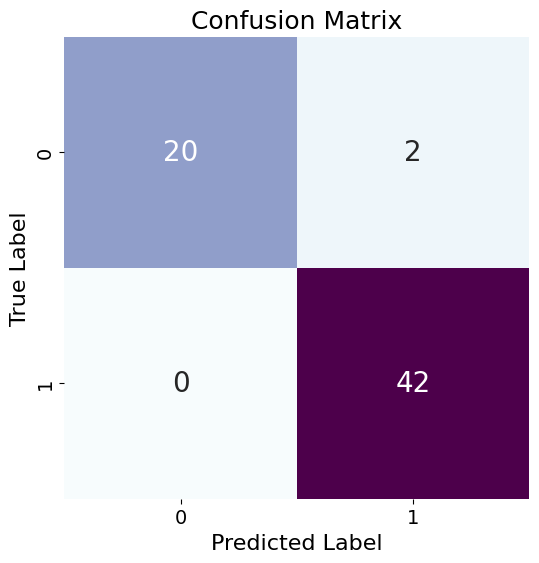

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False, annot_kws={"size": 20})
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


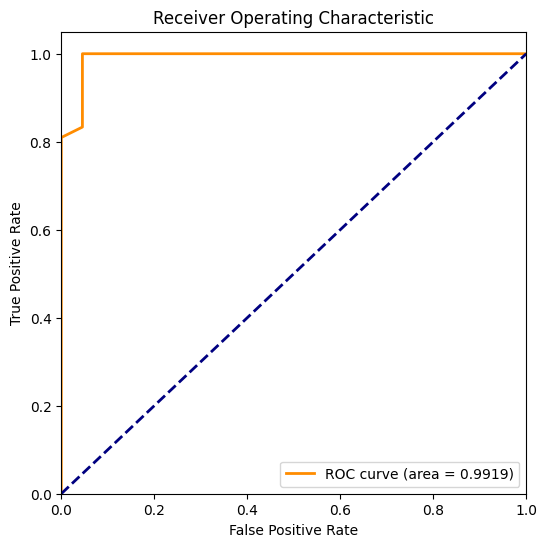

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each class
y_prob = stacking_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# Initialize the LGBMClassifier with the best parameters found from your earlier grid search
lgbm_clf = LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=100)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lgbm_clf, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(6, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Learning Curve for LGBMClassifier', fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() 

## **Tabnet**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = TabNetClassifier()

model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10
)

y_pred_cv = model.predict(X_cv_scaled)

accuracy_cv = accuracy_score(y_cv, y_pred_cv)
print("Accuracy on cross-validation set:", accuracy_cv)

epoch 0  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 2  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 3  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 4  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 5  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 6  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 7  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 8  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 9  | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s
epoch 10 | loss: 0.0     | train_accuracy: 0.62109 | valid_accuracy: 0.57812 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_valid_accuracy = 0.57812
Accuracy on cross-v

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_test = model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy_test)

class_report = classification_report(y_test, y_pred_test,digits=4)
print("Classification Report:\n", class_report)


Accuracy on test set: 0.578125
Classification Report:
               precision    recall  f1-score   support

           0     0.4138    0.5455    0.4706        22
           1     0.7143    0.5952    0.6494        42

    accuracy                         0.5781        64
   macro avg     0.5640    0.5703    0.5600        64
weighted avg     0.6110    0.5781    0.5879        64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


model_tabnet_smote = TabNetClassifier()

model_tabnet_smote.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_train_smote, y_train_smote), (X_test_scaled, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10
)

y_pred_tabnet_smote = model_tabnet_smote.predict(X_test_scaled)

accuracy_tabnet_smote = accuracy_score(y_test, y_pred_tabnet_smote)
print("Accuracy on test set (TabNet with SMOTE):", accuracy_tabnet_smote)

class_report_tabnet_smote = classification_report(y_test, y_pred_tabnet_smote,digits=4)
print("Classification Report (TabNet with SMOTE):\n", class_report_tabnet_smote)


epoch 0  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 2  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 3  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 4  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 5  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 6  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 7  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 8  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 9  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 10 | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_valid_accuracy = 0.57812
Accuracy on test se

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

perceptron_model = Perceptron()

perceptron_model.fit(X_train_scaled, y_train)

y_pred_perceptron = perceptron_model.predict(X_test_scaled)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Accuracy on test set (Perceptron):", accuracy_perceptron)

class_report_perceptron = classification_report(y_test, y_pred_perceptron,digits=4)
print("Classification Report (Perceptron):\n", class_report_perceptron)


Accuracy on test set (Perceptron): 0.84375
Classification Report (Perceptron):
               precision    recall  f1-score   support

           0     0.7308    0.8636    0.7917        22
           1     0.9211    0.8333    0.8750        42

    accuracy                         0.8438        64
   macro avg     0.8259    0.8485    0.8333        64
weighted avg     0.8556    0.8438    0.8464        64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


mlp_model.fit(X_train_scaled, y_train)


y_pred_mlp = mlp_model.predict(X_test_scaled)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy on test set (MLP):", accuracy_mlp)


class_report_mlp = classification_report(y_test, y_pred_mlp,digits=4)
print("Classification Report (MLP):\n", class_report_mlp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy on test set (MLP): 0.9375
Classification Report (MLP):
               precision    recall  f1-score   support

           0     0.8750    0.9545    0.9130        22
           1     0.9750    0.9286    0.9512        42

    accuracy                         0.9375        64
   macro avg     0.9250    0.9416    0.9321        64
weighted avg     0.9406    0.9375    0.9381        64



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


perceptron_model = Perceptron()
perceptron_model.fit(X_train_smote, y_train_smote)

model.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_train_smote, y_train_smote), (X_test_scaled, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10
)

epoch 0  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 1  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epoch 2  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 3  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 4  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 5  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 6  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 7  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 8  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 9  | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s
epoch 10 | loss: 0.0     | train_accuracy: 0.64497 | valid_accuracy: 0.57812 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_valid_accuracy = 0.57812


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
from sklearn.metrics import classification_report


y_pred_perceptron = perceptron_model.predict(X_test_scaled)

y_pred_mlp = mlp_model.predict(X_test_scaled)


class_report_perceptron = classification_report(y_test, y_pred_perceptron,digits=4)
print("Classification Report (Perceptron):\n", class_report_perceptron)


class_report_mlp = classification_report(y_test, y_pred_mlp,digits=4)
print("Classification Report (MLP):\n", class_report_mlp)


Classification Report (Perceptron):
               precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        22
           1     0.9500    0.9048    0.9268        42

    accuracy                         0.9062        64
   macro avg     0.8917    0.9069    0.8982        64
weighted avg     0.9099    0.9062    0.9071        64

Classification Report (MLP):
               precision    recall  f1-score   support

           0     0.8750    0.9545    0.9130        22
           1     0.9750    0.9286    0.9512        42

    accuracy                         0.9375        64
   macro avg     0.9250    0.9416    0.9321        64
weighted avg     0.9406    0.9375    0.9381        64



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report (MLP):
               precision    recall  f1-score   support

           0     0.9130    0.9545    0.9333        22
           1     0.9756    0.9524    0.9639        42

    accuracy                         0.9531        64
   macro avg     0.9443    0.9535    0.9486        64
weighted avg     0.9541    0.9531    0.9534        64



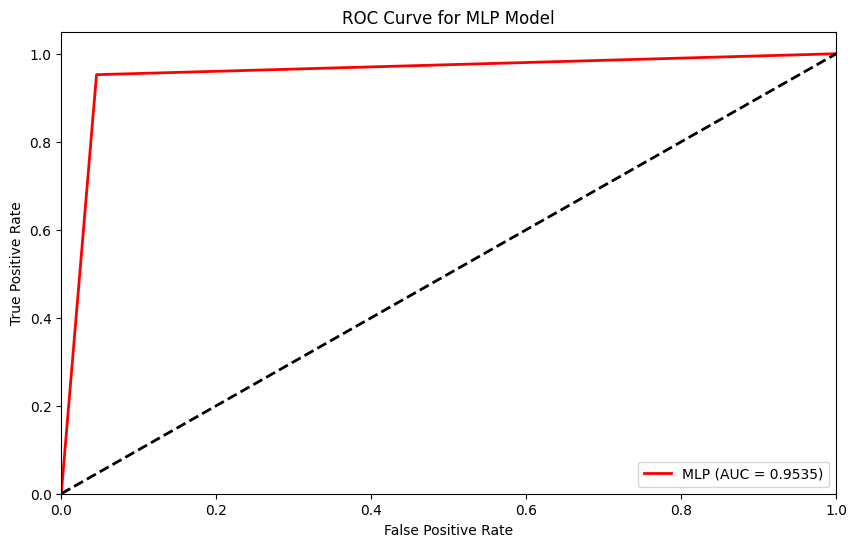

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Assuming you have already defined and split your data into X_train_scaled, X_test_scaled, y_train, y_test

# Define MLP model with specified hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Generate classification report
class_report_mlp = classification_report(y_test, y_pred_mlp, digits=4)
print("Classification Report (MLP):\n", class_report_mlp)

# Calculate ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='MLP (AUC = %0.4f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Model')
plt.legend(loc='lower right')
plt.show()


**SHAP**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150,max_depth=None, min_samples_split=2)
rf_classifier.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(n_estimators=150)

In [ ]:
!pip install shap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

<frozen importlib._bootstrap>:671: ImportWarning: _OpenCVImportHook.exec_module() not found; falling back to load_module()
<frozen importlib._bootstrap>:632: ResourceWarning: unclosed file <_io.BufferedReader name='/usr/local/lib/python3.10/dist-packages/cv2/cv2.abi3.so'>


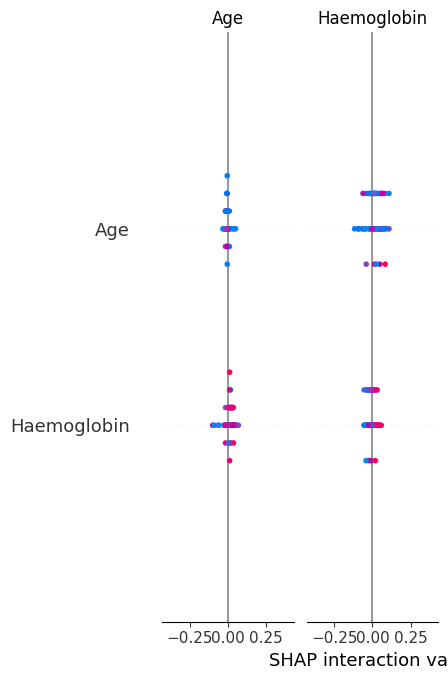

In [ ]:
import shap


# Initialize the explainer with the Random Forest model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)



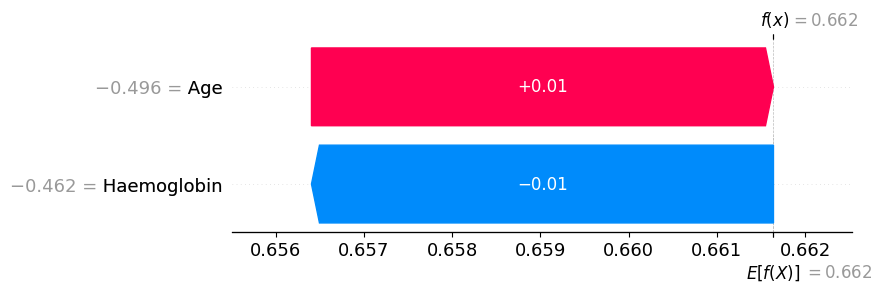

In [ ]:
import shap


explainer = shap.TreeExplainer(rf_classifier)


instance_index = 0
shap_values_instance = explainer.shap_values(X_test_scaled[instance_index])


feature_names = X.columns


shap_explanation = shap.Explanation(values=shap_values_instance[1], base_values=explainer.expected_value[1], data=X_test_scaled[instance_index], feature_names=feature_names)

shap.plots.waterfall(shap_explanation, max_display=13)


In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

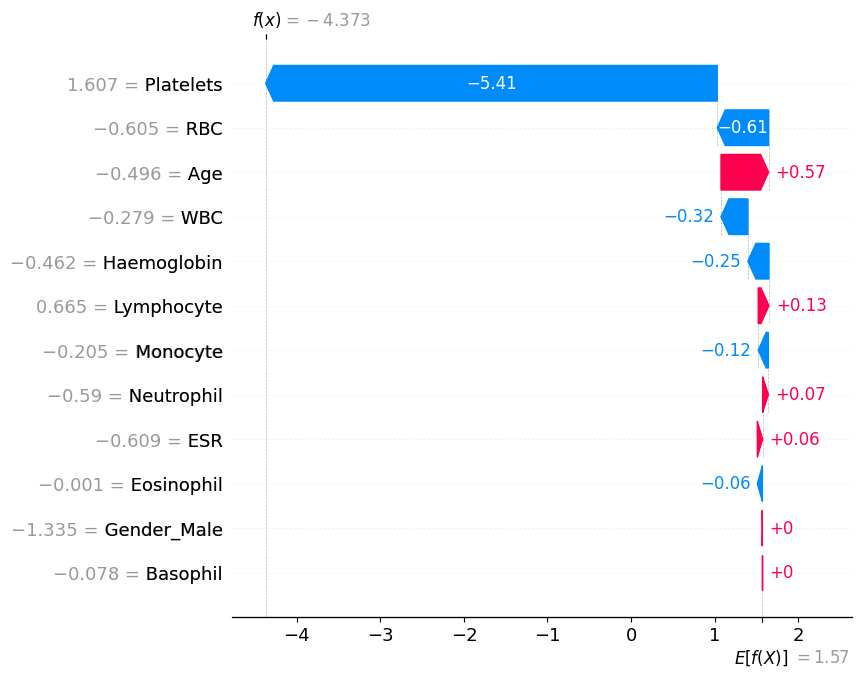

In [ ]:
# Create a SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_classifier, X_train_scaled)

# Choose the instance index for which you want to explain the prediction
instance_index = 0

# Calculate SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(X_test_scaled[instance_index])

# Get feature names
feature_names = X.columns

# Create a SHAP Explanation object
shap_explanation = shap.Explanation(values=shap_values_instance, base_values=explainer.expected_value, data=X_test_scaled[instance_index], feature_names=feature_names)

# Plot the SHAP waterfall plot
shap.plots.waterfall(shap_explanation, max_display=13)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict using RandomForestClassifier
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report for RandomForestClassifier:")
print(report_rf)


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.93      0.98      0.95        42

    accuracy                           0.94        64
   macro avg       0.94      0.92      0.93        64
weighted avg       0.94      0.94      0.94        64



**BI-LSTM**

In [ ]:
import torch
import torch.nn as nn

class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = torch.relu(self.fc1(out[:, -1, :]))
        out = self.fc2(out)
        return out


input_size = 12
hidden_size = 64
num_layers = 2
output_size = 1


bilstm_model = BiLSTM(input_size, hidden_size, num_layers, output_size)


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(bilstm_model.parameters(), lr=0.001)


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

num_epochs = 10
for epoch in range(num_epochs):
    bilstm_model.train()
    optimizer.zero_grad()
    outputs = bilstm_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    bilstm_model.eval()
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
    outputs = bilstm_model(X_test_tensor)
    predicted = torch.round(torch.sigmoid(outputs))
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [ ]:
torch.save(bilstm_model, 'bilstm_model.pth')


In [ ]:
!pip install lime

##LIME

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import lime
import lime.lime_tabular

In [ ]:
# Train Logistic Regression model
lr_classifier = LogisticRegression(C=10, penalty='l2')
lr_classifier.fit(X_train_scaled, y_train)

# Predict using Logistic Regression
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Generate classification report
report_lr = classification_report(y_test, y_pred_lr)

print("Classification Report for Logistic Regression:")
print(report_lr)

**LIME**

In [ ]:
# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Negative', 'Positive'], discretize_continuous=True)

# Choose a random instance for explanation
instance_index = 0  # Choose the instance index for which you want to explain the prediction

# Explain prediction of the instance
exp = explainer.explain_instance(X_test_scaled[instance_index], lr_classifier.predict_proba, num_features=len(X.columns))

# Show explanation
exp.show_in_notebook()

In [ ]:
# LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Negative', 'Positive'], discretize_continuous=True)

# Choose a random instance for explanation
instance_index = 1  # Choose the instance index for which you want to explain the prediction

# Explain prediction of the instance
exp = explainer.explain_instance(X_test_scaled[instance_index], lr_classifier.predict_proba, num_features=len(X.columns))

# Show explanation
exp.show_in_notebook()